### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. So now your aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Although we are attaching the required documents in the attached zip folder but You can also use the below mentioned link and register here to access the problem statement and dataset: 

* https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

The submission file generated by this code is attached in the same folder, Please use the solution checker tab to upload the submission file, the public score would be generated immediately.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
df = pd.read_csv('train_data.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [54]:
# numerical and categorical fields

num = df.select_dtypes(include=['int','float']).columns
cat = df.select_dtypes(include=['object','category']).columns

In [55]:
# visualizing the distribution and boxplots of numerical variables

def distribution(x):
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(df[x], bins=20, ax=ax[0])
    ax[0].set_title('Distribution of {}'.format(x), fontsize=15)
    sns.boxplot(df[x], color='orange', ax=ax[1])
    ax[1].set_title('Boxplot of {}'.format(x), fontsize=15)
    plt.tight_layout()

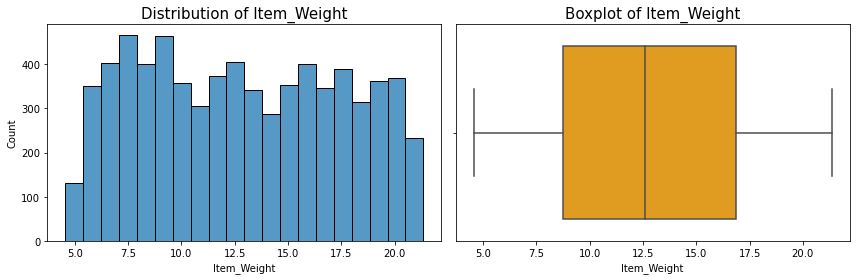

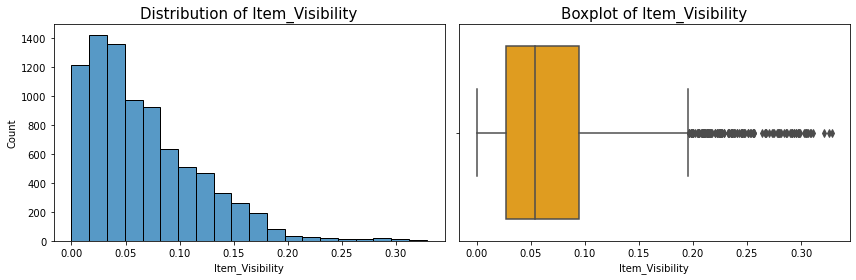

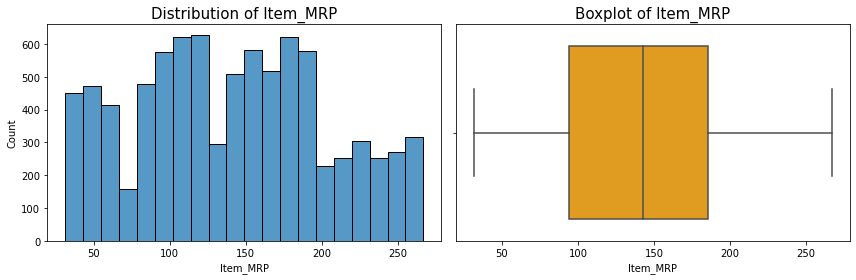

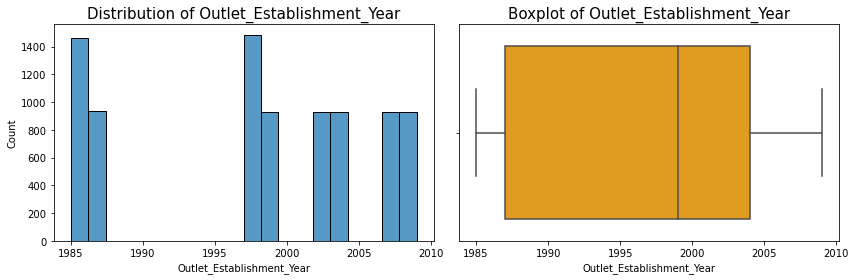

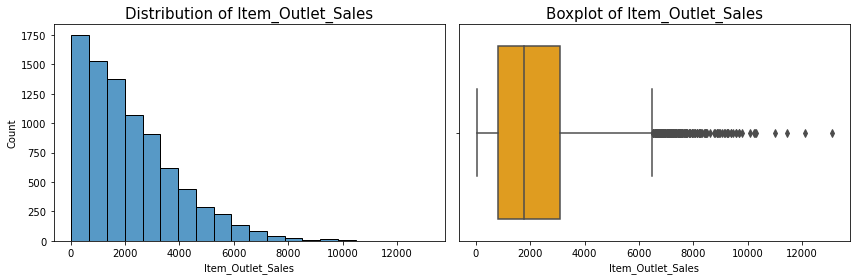

In [56]:
for i in num:
    distribution(i)

### Cleaning Numerical Variables

In [57]:
# item_weight has null values
# imputing mean value

value = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value, inplace=True)

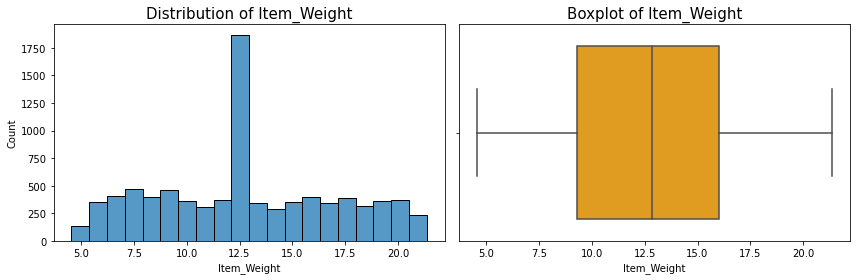

In [58]:
distribution('Item_Weight')

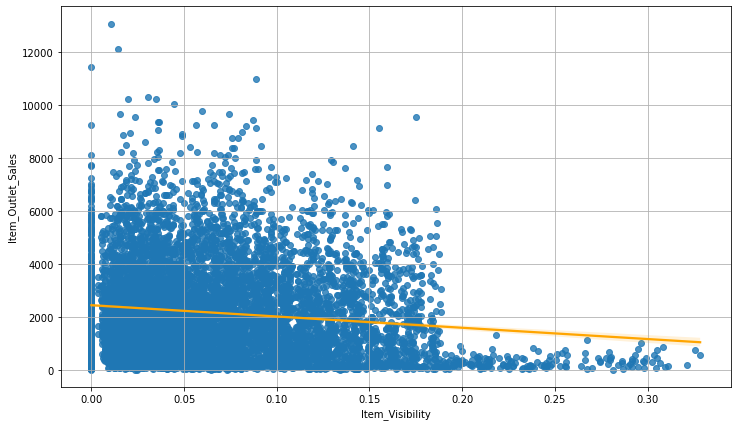

In [59]:
# let's check item visibility vs sales

plt.figure(figsize=(12,7))
sns.regplot(df['Item_Visibility'], df['Item_Outlet_Sales'], line_kws={'color':'orange'})
plt.grid()

In [60]:
# Finding the upper and lower bound values

def finding_range(x):
    xs = pd.Series(sorted(x))
    Q3 = xs.quantile(q=0.75)
    Q1 = xs.quantile(q=0.25)
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [61]:
LR, UR = finding_range(df['Item_Visibility'])
print('Upper Bound Value: {}'.format(LR))
print('Lower Bound Value: {}'.format(UR))

Upper Bound Value: -0.07440424500000001
Lower Bound Value: 0.195979015


In [62]:
# treating the outliers
df['Item_Visibility'] = np.where(df['Item_Visibility']>UR, UR, df['Item_Visibility'])

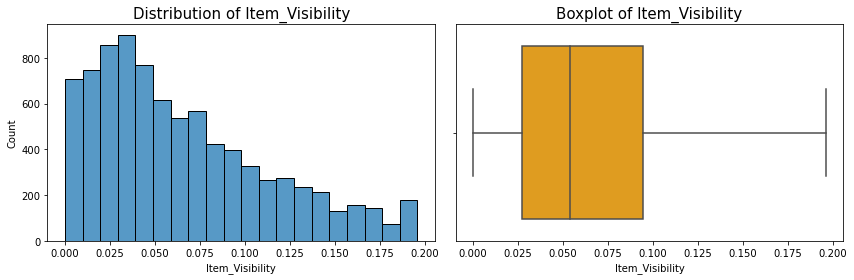

In [63]:
distribution('Item_Visibility')

### Cleaning Categorical Fields

In [64]:
# inspecting the categorical fields

for i in cat[1:]:
    print('Variable: {}'.format(i),'\n')
    print(df[i].value_counts())
    print('\n')

Variable: Item_Fat_Content 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Variable: Item_Type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Variable: Outlet_Identifier 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Variable: Outlet_Size 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Varia

In [65]:
# cleaning item_fat_content field

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

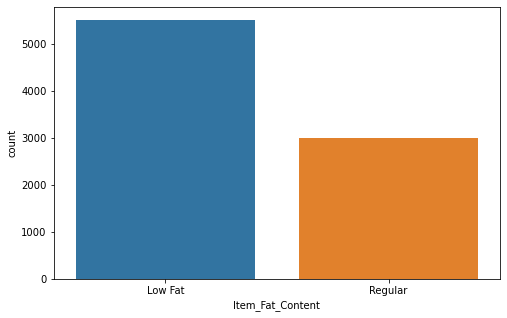

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(df['Item_Fat_Content']);

In [67]:
# treating missing values in outlet_size variable

df['Outlet_Size'].isnull().sum()

2410

In [79]:
df[df['Outlet_Size'].isna()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [78]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,528,0,0,0,930,930
Tier 2,0,0,926,0,0,0,930,929,0,0
Tier 3,555,932,0,928,0,935,0,0,0,0


In [83]:
df[df['Outlet_Location_Type'] == 'Tier 2']['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [84]:
df[df['Outlet_Location_Type'] == 'Tier 3']['Outlet_Size'].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [95]:
df['Outlet_Size'].fillna('Medium', inplace=True)

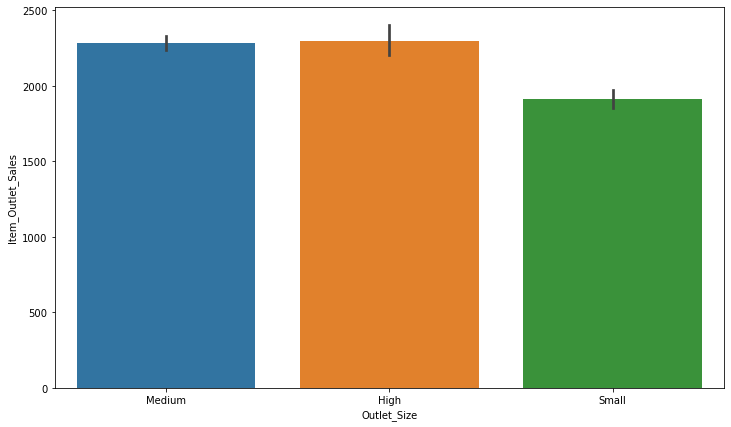

In [96]:
plt.figure(figsize=(12,7))
sns.barplot(df['Outlet_Size'], df['Item_Outlet_Sales']);

### Feature Selection and Engineering

In [104]:
# encoding the categorical variables

col = cat[1:]

for i in col:
    df[i] = pd.Categorical(df[i]).codes

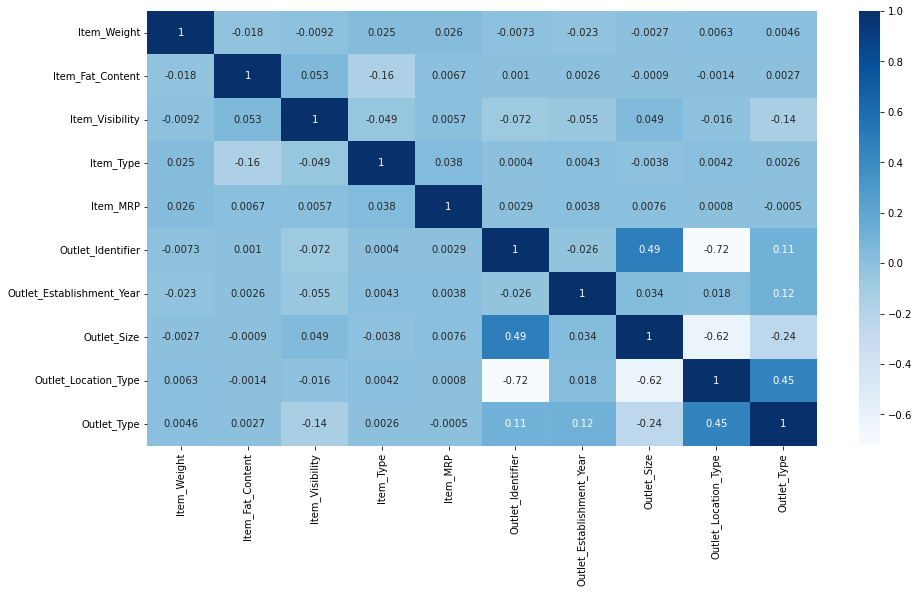

In [105]:
data = df[df.columns[1:11]].copy()

correlation = np.round(data.corr(method='spearman'),4)
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.show()

In [106]:
# feature engineering

df['Outlet_Age'] = 2021 - df['Outlet_Establishment_Year']
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,23
4,NCD19,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,34


In [112]:
# clean train data

# df.to_csv('clean_train_data.csv', index=False)